In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
df.shape

(32581, 12)

In [5]:
df['person_home_ownership'].value_counts()


person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [6]:
df['person_emp_length'].value_counts()

person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [7]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [8]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [9]:
df['cb_person_cred_hist_length'].value_counts()

cb_person_cred_hist_length
2     5965
3     5943
4     5925
8     1902
7     1901
9     1895
5     1881
6     1857
10    1850
14     492
12     485
11     463
16     451
13     443
15     437
17     407
20      31
24      30
28      27
22      22
27      22
30      22
23      22
19      21
21      20
18      19
25      18
26      16
29      14
Name: count, dtype: int64

In [10]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [11]:
plt.figure(figsize=(10, 10)) 

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

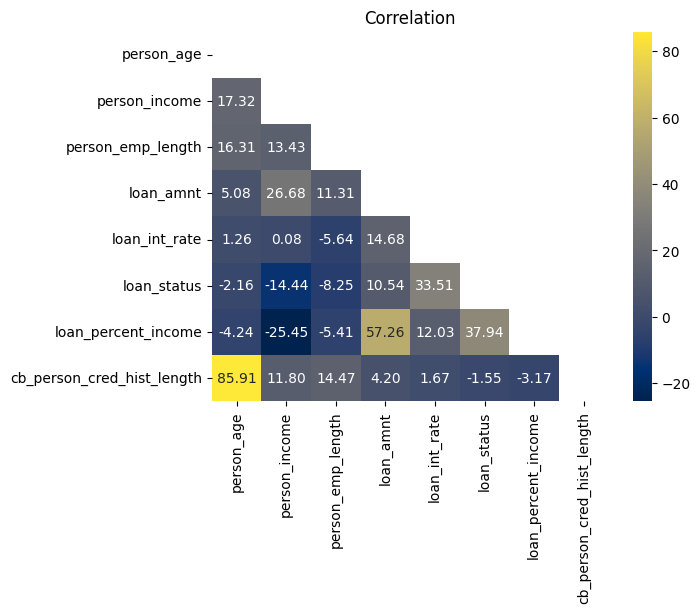

In [12]:
data_num = df.select_dtypes(include=['number'])
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr * 100, cmap = 'cividis', annot= True, fmt='.2f', mask=mask)
plt.title('Correlation')
plt.show()


In [13]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [14]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [16]:
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
df['loan_intent']=le.fit_transform(df['loan_intent'])
df['loan_grade']=le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=le.fit_transform(df['cb_person_default_on_file'])



In [17]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [18]:
df.dropna(axis=0,inplace=True)


In [19]:
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
X=df.drop(['loan_status'],axis=1).values


In [21]:
y=df['loan_status'].values
y

array([1, 0, 1, ..., 1, 0, 0])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=150)
classifier1.fit(X_train,y_train)
y_pred=classifier1.predict(X_test)
y_pred


np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]
[[4419   24]
 [ 376  909]]


0.9301675977653632

In [25]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)

In [26]:
import xgboost

In [27]:
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
y_pred = classifier2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4406   37]
 [ 337  948]]


0.9347067039106145

In [30]:
from sklearn.linear_model import LogisticRegression
classifier4=LogisticRegression(random_state=0)
classifier4.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred = classifier4.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4229  214]
 [ 707  578]]


0.8392108938547486

In [33]:
from sklearn.svm import SVC
classifier5=SVC(kernel='linear',random_state=0)
classifier5.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [34]:
y_pred=classifier5.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
np.concatenate((y_pred,y_test),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [1, 0]])

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4255  188]
 [ 750  535]]


0.8362430167597765

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier6=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier6.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred=classifier6.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
np.concatenate((y_pred,y_test),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)



[[4126  317]
 [ 293  992]]


0.8935055865921788

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [40]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
import warnings
warnings.filterwarnings('ignore')
model.fit(X_train,y_train,batch_size=32,epochs=100)


Epoch 1/100


I0000 00:00:1727701671.731026     102 service.cc:145] XLA service 0x7c506800c340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727701671.731089     102 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 97/716 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.5168

I0000 00:00:1727701676.416185     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


716/716 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8202 - loss: 0.4149
Epoch 2/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8610 - loss: 0.3449
Epoch 3/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8707 - loss: 0.3246
Epoch 4/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8754 - loss: 0.3149
Epoch 5/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8809 - loss: 0.2974
Epoch 6/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.3051
Epoch 7/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8861 - loss: 0.2923
Epoch 8/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8886 - loss: 0.2929
Epoch 9/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8886 - loss: 0.2892
Epoch 10/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8880 - loss: 0.2850
Epoch 11/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8919 - loss: 0.2833
Epoch 12/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

In [42]:
y_pred=model.predict(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [43]:
y_pred=y_pred>0.5

In [44]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
f1_score(y_test,y_pred)

0.7900092506938021

In [45]:
precision_score(y_test,y_pred)

0.9737742303306728

In [46]:
confusion_matrix(y_test,y_pred)

array([[4420,   23],
       [ 431,  854]])

In [47]:
recall_score(y_test,y_pred)

0.6645914396887159

<Axes: >

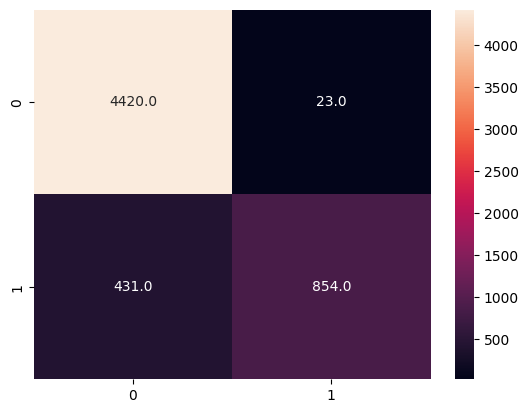

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.1f')